In [20]:
from pandas_datareader import data as pdr
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [3]:
yf.pdr_override()

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


In [4]:
start = datetime.datetime(2000,1,4)
end = datetime.datetime(2024,5,31)
dow = pdr.get_data_yahoo('^DJI',start=start,end=end)
kospi = pdr.get_data_yahoo('^KS11',start=start,end=end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


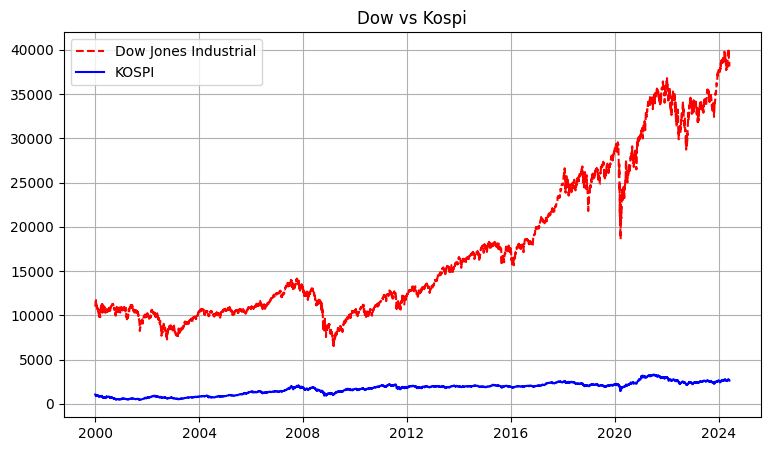

In [5]:
plt.figure(figsize=(9,5))
plt.plot(dow.index,dow.Close,'r--',label='Dow Jones Industrial')
plt.plot(kospi.index,kospi.Close,'b',label='KOSPI')
plt.title('Dow vs Kospi')
# plt.xlabel('Date')
# plt.ylabel('Price')
plt.legend(loc='best')
plt.grid()
plt.show()

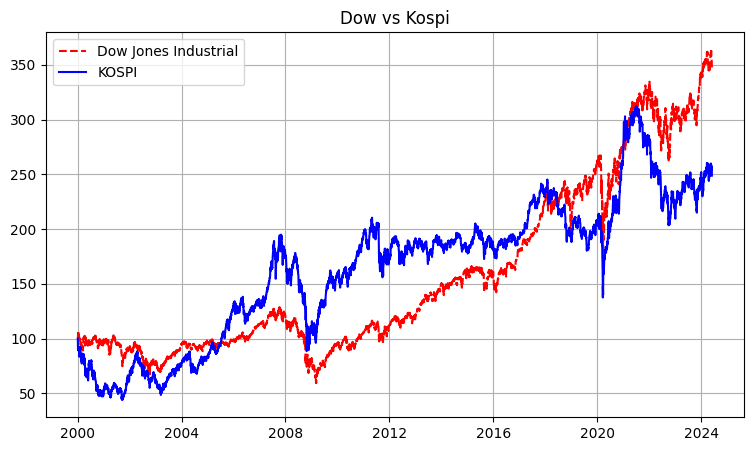

In [6]:
d = (dow.Close/dow.Close.iloc[0]) * 100
k = (kospi.Close/kospi.Close.iloc[0]) * 100
plt.figure(figsize=(9,5))
plt.plot(d.index,d,'r--',label='Dow Jones Industrial')
plt.plot(k.index,k,'b',label='KOSPI')
plt.title('Dow vs Kospi')
# plt.xlabel('Date')
# plt.ylabel('Price')
plt.legend(loc='best')
plt.grid()
plt.show()


In [12]:
df = pd.DataFrame({'Dow':dow['Close'],'Kospi':kospi['Close']})
df = df.fillna(method='ffill') # 앞에 있는 값으로 채우기
df = df.fillna(method='bfill') # 뒤에 있는 값으로 채우기

C:\Users\sangi\AppData\Local\Temp\ipykernel_11060\3897024895.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill') # 앞에 있는 값으로 채우기
C:\Users\sangi\AppData\Local\Temp\ipykernel_11060\3897024895.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='bfill') # 뒤에 있는 값으로 채우기


C:\Users\sangi\AppData\Local\Temp\ipykernel_11060\1146494751.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['Dow'],df['Kospi'],cmap='jet',alpha=1,marker='.')


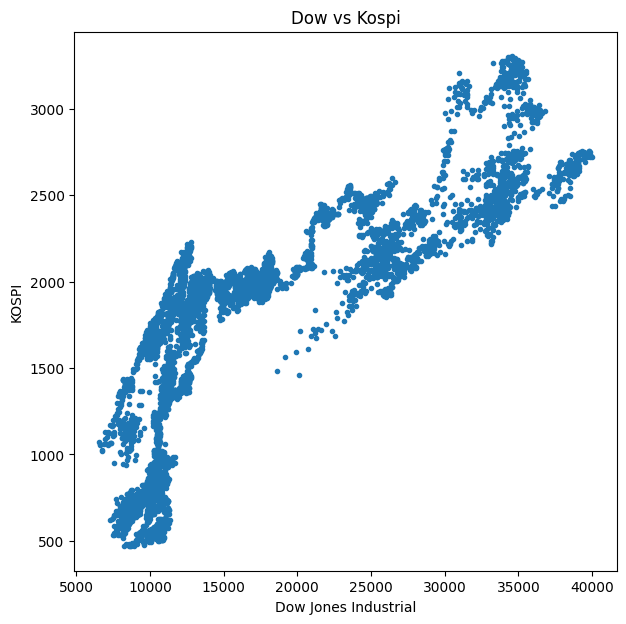

In [18]:
plt.figure(figsize=(7,7))
plt.scatter(df['Dow'],df['Kospi'],cmap='jet',alpha=1,marker='.')
plt.xlabel('Dow Jones Industrial')
plt.ylabel('KOSPI')
plt.title('Dow vs Kospi')
plt.show()

In [24]:
df.corr() # 상관계수
df['Dow'].corr(df['Kospi'])

0.8247176112036713

In [25]:
regr = stats.linregress(df['Dow'],df['Kospi'])
regr_line = f'y = {regr.slope:.2f}*x + {regr.intercept:.2f}'

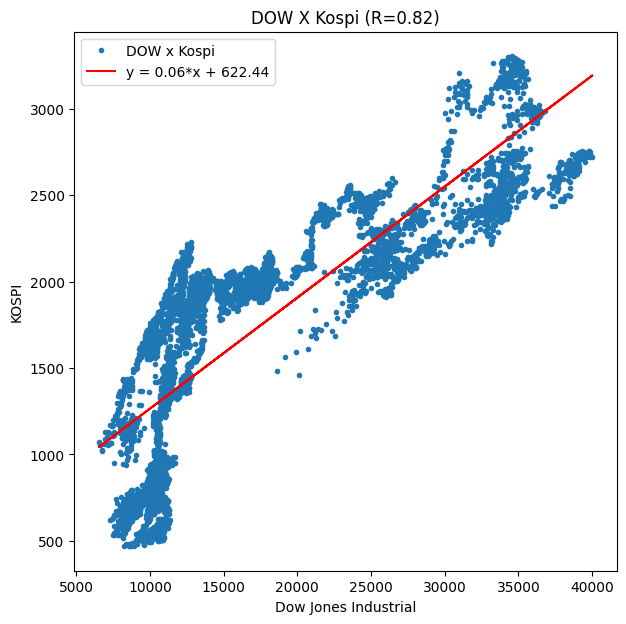

In [30]:
plt.figure(figsize=(7,7))
plt.plot(df['Dow'],df['Kospi'],'.')
plt.plot(df['Dow'],regr.slope*df['Dow']+regr.intercept,'r')
plt.legend(["DOW x Kospi",regr_line]E)
plt.title(f'DOW X Kospi (R={regr.rvalue:.2f})')
plt.xlabel('Dow Jones Industrial')
plt.ylabel('KOSPI')
plt.show()